<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/Exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install uncertainties
!pip install julian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


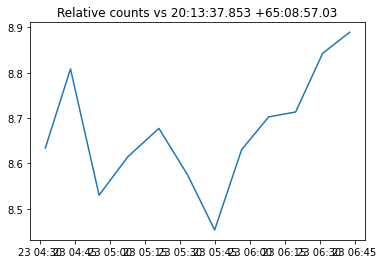

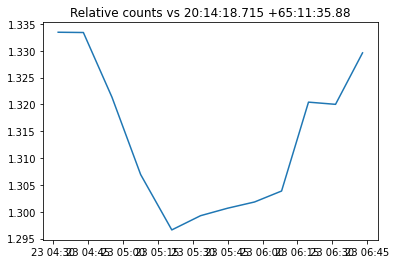

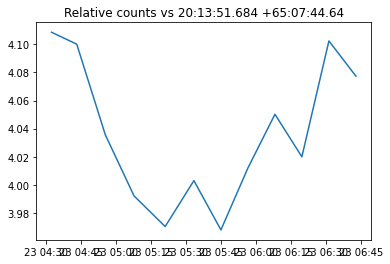

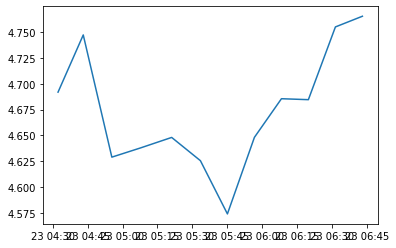

In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import uncertainties as uc
from uncertainties import unumpy
import julian

timeStamps = [datetime.datetime(2011,8,23,4,32,20),
              datetime.datetime(2011,8,23,4,43,9),#interval 10min 49sec
              datetime.datetime(2011,8,23,4,55,25),# 12min 16sec
              datetime.datetime(2011,8,23,5,7,43), 
              datetime.datetime(2011,8,23,5,21,5),
              datetime.datetime(2011,8,23,5,33,25),
              datetime.datetime(2011,8,23,5,45),
              datetime.datetime(2011,8,23,5,56,35),
              datetime.datetime(2011,8,23,6,8,11),
              datetime.datetime(2011,8,23,6,19,44),
              datetime.datetime(2011,8,23,6,31,20),
              datetime.datetime(2011,8,23,6,42,55)]

target = np.array([174720,172740,173570,173050,171930,170930,168850,169600,171170,173040,174280,175240])
cali1 = np.array([20237,19611,20348,20088,19814,19935,19974,19651,19669,19859,19709,19714])
cali2 = np.array([131030,129550,131360,132410,132600,131560,129820,130280,131280,131050,132030,131800])
cali3 = np.array([42526,42131,43010,43347,43303,42700,42553,42273,42262,43045,42483,42979])

normed1 = target/cali1
normed2 = target/cali2
normed3 = target/cali3

plt.plot(timeStamps,normed1)
plt.title("Relative counts vs 20:13:37.853 +65:08:57.03")
plt.savefig("1:20:13:37_853+65:08:57_03.png")

plt.figure()
plt.plot(timeStamps,normed2)
plt.title("Relative counts vs 20:14:18.715 +65:11:35.88")
plt.savefig("2:20:14:18_715+65:11:35_88.png")

plt.figure()
plt.plot(timeStamps,normed3)
plt.title("Relative counts vs 20:13:51.684 +65:07:44.64")
plt.savefig("3:20:13:51_684+65:07:44_64.png")

'''Crazy mean taking madness'''
meanResult = np.zeros(len(timeStamps))
for i in range(len(timeStamps)):
  meanResult[i] = np.mean([normed1[i],normed2[i],normed3[i]])

plt.figure()
plt.plot(timeStamps,meanResult)


In [3]:

intervals = np.empty(11,dtype=datetime.timedelta)
for i in range(len(timeStamps)-1):
  intervals[i] = timeStamps[i+1] - timeStamps[i]
print(intervals)
print(np.mean([649,736,738,802,740,695,695,696,693,696,695])/2)

[datetime.timedelta(seconds=649) datetime.timedelta(seconds=736)
 datetime.timedelta(seconds=738) datetime.timedelta(seconds=802)
 datetime.timedelta(seconds=740) datetime.timedelta(seconds=695)
 datetime.timedelta(seconds=695) datetime.timedelta(seconds=696)
 datetime.timedelta(seconds=693) datetime.timedelta(seconds=696)
 datetime.timedelta(seconds=695)]
356.1363636363636


In [4]:
'''Combined keplers 3rd and transit time eq, looking for a

Kep     | P = (2pi*a^3/2)/(GM)^1/2
transit | a = (P*Rstar)/T*pi

'''
import scipy.constants as con
T     = uc.ufloat(6551,356)   #s
Rstar = (0.823)*(6.96*10**8)  #m
Mstar = (0.85) *(2*10**30)    #kg

#a = ((T/Rstar)**2)*(4/(con.G*Mstar))
#a = ((T*((con.G*Mstar)**0.5))/(2*Rstar))**(2/5)
a = ((T**2)*(con.G*Mstar))/(4*(Rstar**2))

print(f"{a}") # semimajor axis

(3.7+/-0.4)e+09


In [5]:
P = (a * np.pi * T)/Rstar
print(P) #period

(1.33+/-0.22)e+05


In [6]:
'''Julian date   Phase  (Velocity(m/s),Uncertainty(m/s))'''
RadialData = np.array([
[2455518.69628,float(0.2014),uc.ufloat(-37964.7,9.2622)],#1
[2455519.59174,float(0.8320),uc.ufloat(-37483.5,4.6936)],#2
[2455520.63231,float(0.5648),uc.ufloat(-37593.9,14.1425)],#3
[2455521.58409,float(0.2350),uc.ufloat(-37901.3,8.3571)],#4
[2455523.60908,float(0.6610),uc.ufloat(-37573.9,6.8672)],#5
[2455525.59298,float(0.0581),uc.ufloat(-37835.0,7.0690)],#6
[2455526.58711,float(0.7582),uc.ufloat(-37473.2,7.0483)],#7
[2455527.59121,float(0.4653),uc.ufloat(-37749.6,25.3662)],#8
[2455528.58427,float(0.1646),uc.ufloat(-37875.3,7.2845)]#9
])

dateConverstion = np.zeros(9,dtype=datetime.datetime)
for i in range(9):
  dateConverstion[i] = julian.from_jd(RadialData[i,0])

VelAndUncert = unumpy.uarray([-37964.7,-37483.5,-37593.9,-37901.3,-37573.9,-37835.0,-37473.2,-37749.6,-37875.3],
                             [9.2622,4.6936,14.1425,8.3571,6.8672,7.0690,7.0483,25.3662,7.2845])


VelocityNominals = np.array(unumpy.nominal_values(VelAndUncert))
devs = np.array(unumpy.std_devs(VelAndUncert))
phase = np.array([0.2014,0.8320,0.5648,0.2350,0.6610,0.0581,0.7582,0.4653,0.1646])#phase

VelocityMean = sum(VelAndUncert)/len(VelocityNominals)
VelocityRelative = VelocityNominals - VelocityMean
 



In [7]:
print(VelocityMean)

-37717+/-4


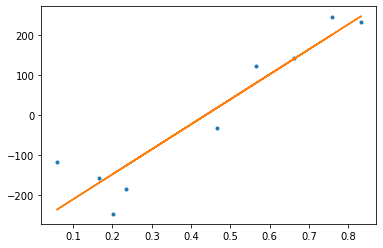

In [8]:
'''2d analysis was a hard path to tred, lost time data'''
plt.plot(phase,unumpy.nominal_values(VelocityRelative),".") #full data has 2 outliers at the lower end
#plt.plot(phase[phase>=0.2],VelocityNominals[phase>=0.2],".")
#plt.errorbar(phase[phase>=0.2],VelocityNominals[phase>=0.2],devs[phase>=0.2])

trendPolyCoeff = np.polyfit(phase,unumpy.nominal_values(VelocityRelative),1)
trendPoly = np.poly1d(trendPolyCoeff)
plt.plot(phase,trendPoly(phase))


[16.91590905  0.07180779  0.22567517]


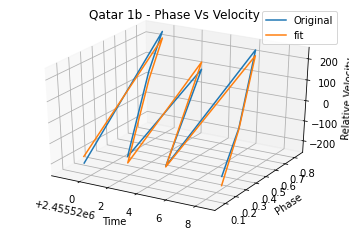

In [9]:
from scipy.optimize import curve_fit


#plot origonal data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.plot(RadialData[:,0],phase,unumpy.nominal_values(VelocityRelative),label="Original")

#define fitting function, sin
def sinExpand(time,amplitude=1,frequency=1,phase=0):
  return amplitude * (np.sin((time*2*np.pi*frequency)+phase))

#curve fit grunt work
guess = np.array([-216,0.9,1])
popt, pcov = curve_fit(sinExpand , phase , unumpy.nominal_values(VelocityRelative) , guess , unumpy.std_devs(VelocityRelative))
y_from_cfit = sinExpand(phase,amplitude = popt[0], frequency = popt[1],phase=popt[2])

plt.plot(RadialData[:,0],phase,y_from_cfit,label="fit") #plot to graph for confirmation of fit

#make it fit for lab diary
plt.title("Qatar 1b - Phase Vs Velocity")
plt.xlabel("Time")
plt.ylabel("Phase")
ax.set_zlabel("Relative Velocity")
plt.legend()



perr = np.sqrt(np.diag(pcov)) # errors
print(perr) #Amp, Freq, Phase

plt.savefig("Qatar1bPhaseVelocity.png")


In [10]:
print(f"{popt[0]} is the amplitude, with std dev of {perr[0]}")
vel = uc.ufloat(popt[0],perr[0])

-216.79166088104293 is the amplitude, with std dev of 16.91590904784246


In [11]:
MP = ( vel * (Mstar**(2/3)) * (P**(1/3)) ) / (2*np.pi*con.G)**(1/3)
print(MP)

(-2.11+/-0.20)e+27


In [12]:
R1 = np.array([uc.ufloat(0.175,0.087),uc.ufloat(0.127,0.016),uc.ufloat(0.130,0.026)])

MeanRadius = np.sum(R1)/3
print(MeanRadius)

0.144+/-0.031
